In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Model name used to save the weights in h5 format. The name match with the Jupyter notebook

MODEL_NAME = 'original_model'

In [3]:
# DATA PATHS

TRAIN_FOLDER_PATH = '../../data/train/'
VAL_FODLER_PATH = '../../data/validation/'
#TEST_FOLDER_PATH = '../../data/test/'
TEST_FOLDER_PATH = '../../data/test_manual'
PREVIEW_IMAGES_FOLDER = '../../data/preview/'

PREDICTION_FILE_PATH = '../../data/' + MODEL_NAME + '.csv'

In [4]:
# Configure hyperparameters
img_width = 100
img_height = 100
img_depth = 3

classes = 2
batch_size = 64
num_epochs = 60
loss = "categorical_crossentropy"
learning_rate = 1e-6
decay = 1e-6
momentum = 0.9
l2_reg = 1e-6

In [5]:
# MODEL TRAINING CONFIGURATION

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_FOLDER_PATH,
    target_size = (img_height,img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_FODLER_PATH,
    target_size = (img_height, img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    TEST_FOLDER_PATH,
    target_size = (img_height, img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 20668 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


In [6]:
# Model architecture
inputShape = (img_height, img_width, img_depth)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=inputShape, activity_regularizer=regularizers.l2(l2_reg)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activity_regularizer=regularizers.l2(l2_reg)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activity_regularizer=regularizers.l2(l2_reg)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activity_regularizer=regularizers.l2(l2_reg)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activity_regularizer=regularizers.l2(l2_reg)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [7]:
# Callbacks
mc = ModelCheckpoint('best_' + MODEL_NAME + '.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [8]:
# Compile the model
opt = SGD(lr=learning_rate, decay=decay, momentum=momentum, nesterov=True)

model.compile(loss=loss, optimizer = opt, metrics=["accuracy"])

In [9]:
# Fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // validation_generator.batch_size,
    use_multiprocessing = False,
    callbacks = [mc]
)

Epoch 1/60


W0623 08:01:48.513738 139635970983744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


321/322 [============================>.] - ETA: 0s - loss: 0.7125 - accuracy: 0.4970
Epoch 00001: val_accuracy improved from -inf to 0.49746, saving model to best_original_model.h5
322/322 [==============================] - 46s 142ms/step - loss: 0.7124 - accuracy: 0.4972 - val_loss: 0.7098 - val_accuracy: 0.4975
Epoch 2/60
321/322 [============================>.] - ETA: 0s - loss: 0.7112 - accuracy: 0.5068
Epoch 00002: val_accuracy did not improve from 0.49746
322/322 [==============================] - 43s 135ms/step - loss: 0.7111 - accuracy: 0.5069 - val_loss: 0.7097 - val_accuracy: 0.4931
Epoch 3/60
321/322 [============================>.] - ETA: 0s - loss: 0.7115 - accuracy: 0.5048
Epoch 00003: val_accuracy did not improve from 0.49746
322/322 [==============================] - 43s 135ms/step - loss: 0.7115 - accuracy: 0.5048 - val_loss: 0.7095 - val_accuracy: 0.4916
Epoch 4/60
321/322 [============================>.] - ETA: 0s - loss: 0.7114 - accuracy: 0.5036
Epoch 00004: val_ac

Epoch 27/60
321/322 [============================>.] - ETA: 0s - loss: 0.7090 - accuracy: 0.5130
Epoch 00027: val_accuracy improved from 0.56177 to 0.56286, saving model to best_original_model.h5
322/322 [==============================] - 42s 132ms/step - loss: 0.7091 - accuracy: 0.5127 - val_loss: 0.7079 - val_accuracy: 0.5629
Epoch 28/60
321/322 [============================>.] - ETA: 0s - loss: 0.7091 - accuracy: 0.5166
Epoch 00028: val_accuracy improved from 0.56286 to 0.56577, saving model to best_original_model.h5
322/322 [==============================] - 42s 132ms/step - loss: 0.7091 - accuracy: 0.5166 - val_loss: 0.7079 - val_accuracy: 0.5658
Epoch 29/60
321/322 [============================>.] - ETA: 0s - loss: 0.7097 - accuracy: 0.5074
Epoch 00029: val_accuracy did not improve from 0.56577
322/322 [==============================] - 42s 130ms/step - loss: 0.7097 - accuracy: 0.5077 - val_loss: 0.7078 - val_accuracy: 0.5652
Epoch 30/60
321/322 [============================>.] -

Epoch 54/60
321/322 [============================>.] - ETA: 0s - loss: 0.7074 - accuracy: 0.5227
Epoch 00054: val_accuracy improved from 0.57395 to 0.57431, saving model to best_original_model.h5
322/322 [==============================] - 43s 134ms/step - loss: 0.7074 - accuracy: 0.5225 - val_loss: 0.7064 - val_accuracy: 0.5743
Epoch 55/60
321/322 [============================>.] - ETA: 0s - loss: 0.7078 - accuracy: 0.5185
Epoch 00055: val_accuracy did not improve from 0.57431
322/322 [==============================] - 43s 133ms/step - loss: 0.7078 - accuracy: 0.5183 - val_loss: 0.7063 - val_accuracy: 0.5741
Epoch 56/60
321/322 [============================>.] - ETA: 0s - loss: 0.7075 - accuracy: 0.5201
Epoch 00056: val_accuracy did not improve from 0.57431
322/322 [==============================] - 43s 133ms/step - loss: 0.7075 - accuracy: 0.5202 - val_loss: 0.7063 - val_accuracy: 0.5738
Epoch 57/60
321/322 [============================>.] - ETA: 0s - loss: 0.7070 - accuracy: 0.5222
E

In [10]:
# Save model
model.save_weights(MODEL_NAME + '.h5')

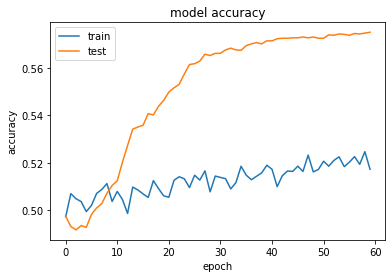

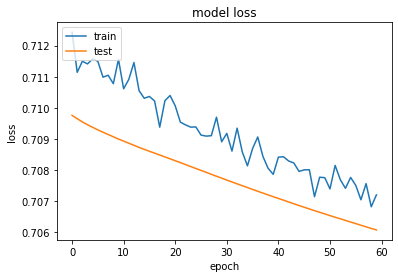

In [11]:
# Plot accuracy and loss values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Evaluate the model
model.evaluate_generator(validation_generator, steps = validation_generator.n // validation_generator.batch_size)

[0.7060819032580353, 0.57503635]

In [13]:
# Predictions

test_generator.reset()
predIdxs = model.predict_generator(test_generator,steps=(test_generator.n // test_generator.batch_size) + 1)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show classification report
print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

 parasitized       0.58      0.46      0.51       688
  uninfected       0.55      0.67      0.61       688

    accuracy                           0.56      1376
   macro avg       0.57      0.56      0.56      1376
weighted avg       0.57      0.56      0.56      1376



In [14]:
cm = confusion_matrix(test_generator.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

acc: 0.5647
sensitivity: 0.4622
specificity: 0.6672
